# Artificial Intelligence Course, Dr.Fadaei

# CA3 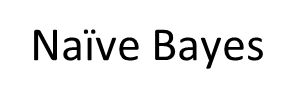

## Parnian Fazel - 810198516

### Goal

In this assignment we are to use **naive bayes** as classifier. Naive bayes is a classification technique based on `Bayes’ Theorem` with an assumption of **independence** among predictors. `Naive Bayes classifier` assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Also we get familiar with the **bag of words** method, new libraries like `hazm`, new methods to **normalize** text, how to modify our model in order to get better results and how to **evaluate** our model.

### Brief Description

In this assignment we are given two set of data: 1-train data 2-test data. These datas are extracted from `Divar` website and we should classify the test data which consist of the title and the description of an advertisement into 6 classes: 1-vehicles 2-personal 3-businesses 4-for-the-home 5-leisure-hobbies 6-electronic-devices. First we should go through preprocessing the data and then create our model based on the train data. In the end there is an evaluation part where we can access how efficient the created model is!

I employed the `hazm` library which I used to preprocess the data. This library is for datas in Persian.

This is how it is installed:

import sys

!{sys.executable} -m pip install hazm

#### Imported Libraries

In [706]:
from __future__ import unicode_literals
from hazm import * 
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import collections
from collections import Counter

**Loading Data**

*divar_train.csv* is given as the **train** data and *divar_test.csv* as **test** data.

In [707]:
train_df = pd.read_csv(r"Data/divar_train.csv")
test_df = pd.read_csv(r"Data/divar_test.csv")

In [708]:
train_df.head()

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خودم بزرگشون کردم اما دستی نیستن واسه همین قیمت پایین دادم.هر سه با هم 100تومان مقطوع مقطوع,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی میباشد فقط ٤بار استفاده شده بدون خط و خش,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal


In [709]:
test_df.head()

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nمارکzyxel\nبرای خرید فقط با شماره ی زیر تماس بگیرید\n$NUM,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فروش می رسد جفتی120000تومان به مشتری واقعی تخفیف جزئ میدم,leisure-hobbies


## Pre-Process

Feature engineering is one of the most important steps in machine learning. It is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If we can use suitable features and feed them to our model then the model will be able to understand the sentence better. Here I merged the "title" column and the "description" column in a way that for each row of the train dataset the title is added 4 times to the merged column named "data". Note that by increasing this value the results does not necessarily get better for instance when I added the title 5 times, the results got worse.

In [710]:
train_df['title'] = train_df['description'] + ' ' + 4*(train_df['title']+ ' ')
test_df['title'] = test_df['description'] + ' ' + 4*(test_df['title']+ ' ')
train_df = train_df.rename(columns={'title': 'data'})
test_df = test_df.rename(columns={'title': 'data'})
train_df.drop(columns = train_df.columns[1], axis = 1, inplace = True)
test_df.drop(columns = test_df.columns[1], axis = 1, inplace = True)
train_df.head()

,data,categories
0,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خودم بزرگشون کردم اما دستی نیستن واسه همین قیمت پایین دادم.هر سه با هم 100تومان مقطوع مقطوع بلبل خرمایی بلبل خرمایی بلبل خرمایی بلبل خرمایی,leisure-hobbies
1,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی میباشد فقط ٤بار استفاده شده بدون خط و خش عینک اسکی در حد عینک اسکی در حد عینک اسکی در حد عینک اسکی در حد,leisure-hobbies
2,پارچه ای سالم و تمیز. تکیه سر تویوتا پرادو تکیه سر تویوتا پرادو تکیه سر تویوتا پرادو تکیه سر تویوتا پرادو,vehicles
3,مجسمه دکوری کریستال بالرین Rcr24% مجسمه کریستال24% مجسمه کریستال24% مجسمه کریستال24% مجسمه کریستال24%,for-the-home
4,هر 2 کاملا تمیز هستند کیف و ساک کیف و ساک کیف و ساک کیف و ساک,personal


In [711]:
test_df.head()

,data,categories
0,کیف مجلسی نوی نو کیف مجلسی نو کیف مجلسی نو کیف مجلسی نو کیف مجلسی نو,personal
1,مناسب برای جهاز عروس دیوار کوب نمدی تزیینی دیوار کوب نمدی تزیینی دیوار کوب نمدی تزیینی دیوار کوب نمدی تزیینی,for-the-home
2,با کشوی مخفی و شیک دو تیکه بسیار بسیار تمیز و سالم دو تیکه بسیار بسیار تمیز و سالم دو تیکه بسیار بسیار تمیز و سالم دو تیکه بسیار بسیار تمیز و سالم,for-the-home
3,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nمارکzyxel\nبرای خرید فقط با شماره ی زیر تماس بگیرید\n$NUM مودم مودم مودم مودم,electronic-devices
4,سلام تعدای بوقلمون دارم به علت جابه جایی به فروش می رسد جفتی120000تومان به مشتری واقعی تخفیف جزئ میدم تعداد18عددبوقلمون به قیمت عمده تعداد18عددبوقلمون به قیمت عمده تعداد18عددبوقلمون به قیمت عمده تعداد18عددبوقلمون به قیمت عمده,leisure-hobbies


I used the prepared function in hazm library in order to preprocess the data. Both stemmer and lemmatizer can word preprocessing the data but I used the lemmatizer beacuse it was more appropriate for my model and I got better results. I used normalizer because if I did not the scores in evaluation part got a little lower.

#### **Question 1)**  stemming vs lemmatization :

**Similarities:** Reducing the inflectional forms of each word into a **common base** or **root**.

**Differences:** `Stemming` algorithms work by cutting off the end or the beginning of the word on the other hand, `Lemmatization` takes into consideration the morphological analysis of the words. Lemmatization is more **accurate** than stemming but **slower**. Stemming is preferred when the **meaning** of the word is not important for analysis but when the meaning should take into account, we should use lemmatization. Lemmatization is a method responsible for grouping different inflected forms of words into the root form, having the **same meaning** but by stem we may lose data beacuse it mainly chops off the last characters of the word in order to get the root. Generally, using lemmatization in datas like is more recommneded. 

Imagin the word "studies":

by stemming: "stud"

by lemmatization: "sudy"

In [712]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

Example of finctioning stem and lemmatize:

In [713]:
stemmer.stem('دیدم')

'دید'

In [714]:
print(lemmatizer.lemmatize('دیدم'))

دید#بین


Counting number of each class occured in train data:

In [715]:
train_df['categories'].value_counts()

for-the-home          1700
vehicles              1700
businesses            1700
electronic-devices    1700
leisure-hobbies       1700
personal              1700
Name: categories, dtype: int64

Counting number of each class occured in test data:

In [716]:
test_df['categories'].value_counts()

for-the-home          300
vehicles              300
businesses            300
electronic-devices    300
leisure-hobbies       300
personal              300
Name: categories, dtype: int64

Here I defined some parameters which I used in text normalizing:

In [717]:
stop_list = stopwords_list()
stop_list.extend(["\n", "\t", "\r", "\'"])
num_and_letter ={
    '۱','۲','۳','۴','۵','۶','۷','۸','۹','۰','1','2','3','4','5','6','7','8','9','0','A','B','C','D','E','F','G','H','I','J',
    'K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'}
puncs = {
    '*', ')', '٪', '»', '«', '★', '✅', '♡', '🔴', '❌', '♤', '✔️', '@', '#', '$', '%', '^', '&', '☆',
    '(', ']', '[', '-', '؛', '¿', '_', '/', '.', ':', ';', '?', '!', '`', '~', '،', ' '}

In [718]:
def pre_process(data):
    normalized_data = normalizer.normalize(data)
    words = word_tokenize(normalized_data)
    for i in range(len(words)):
        lemmatized = lemmatizer.lemmatize(words[i])
        words[i] = lemmatized.split('#')[0]
    for word in words:
        result = ""
        for char in word:
            if (char not in puncs) and (char not in num_and_letter):
                result += char
        word = result
    pre_processed_words = list()
    for word in words:
        if word == "" or word == "." or word == '،' or word in stop_list:
            continue
        pre_processed_words.append(word)
    return pre_processed_words

### Extracting all words from the test data

I used a dictionary in order to save all words in each category

In [719]:
words_in_categories = dict()
for i, row in train_df.iterrows():
    if row['categories'] in words_in_categories:
        words_in_categories[row['categories']].extend(pre_process(row['data']))
    else:
        words_in_categories[row['categories']] = []                                 

### Count Frequencies

Since in this assignment the probabilities can be yeilded by the appearance frequency of the word we need to count the frequencies. I save the frequencies of each word in all categories in a nested dictionary. Actually the main part of training the data in this project is finding the frequencies of each word in each class.

In [720]:
words_frequency_in_categories = dict(dict())
for category in words_in_categories:
    if category == "vehicles":
        words_frequency_in_categories["vehicles"] = Counter(words_in_categories["vehicles"])
    elif category == "personal":
        words_frequency_in_categories["personal"] = Counter(words_in_categories["personal"])
    elif category == "businesses":
        words_frequency_in_categories["businesses"] = Counter(words_in_categories["businesses"])
    elif category == "leisure-hobbies":
        words_frequency_in_categories["leisure-hobbies"] = Counter(words_in_categories["leisure-hobbies"])
    elif category == "electronic-devices":
        words_frequency_in_categories["electronic-devices"] = Counter(words_in_categories["electronic-devices"])
    elif category == "for-the-home":
        words_frequency_in_categories["for-the-home"] = Counter(words_in_categories["for-the-home"])

Here I call the preprocess function for every row in the train data.

In [721]:
pr = dict()
for i, row in test_df.iterrows():
    pr[row["data"]] = pre_process(row["data"])

## Computing Probabilities

### Bag of Words Model

A **bag-of-words** is a representation of text that describes the occurrence of words within a document.
It is called a “bag” of words, because any information about the **order** or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. So every word is **independent** from its **position** and we can ignore the sequence of each word.

The **features** in this model are the **frequencies** of each word in each class. Hence, as the frequency of a word in class `c` gets higher the probability of choosing class `c` for the that word gets higher.

Consider the given image wich is ne `Naive Bayes` formula:

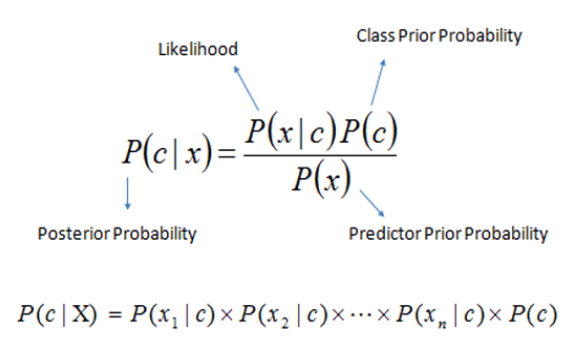

### Question 2) Describe all the parameters in the picture above:

* **Class Prior Probability:** Is the probability before using the datas and evidence and analyzing them. So here because of the fact that all the classes have equal frequecies(1700 as we calculated before), the prior probability for all classes is $\frac{1}{6}$. It can be calculated by dividing the number of appearences of that class in train dataframe by all the appearneces of all classes in train data frame. Here is: $\frac{1700}{10200}=\frac{1}{6}$
* **Likelihood:**  Is the probability of predictor given class and shows probability of being a word in a class. For calculating $P(x|c)$ as I mentioned above we should divide the frequency of each word in class `c` by all the words in class `c`. Note that here x is showing a sentence and every $x_i$ is a word.
* **Posterior Prabability:** It is the probability we are looing for: the probability of a class being choosed given a word. The posterior here is calculated by the given formula but we ignore the evidence.
* **Evidence:** Evidence is the probability of the x used to update the prior. In our context, evidence is the probability of the occurness of the word x in the given text. Since this term is independent from words in classes the value of it is same in all cases through using bayes so we can ignore it in calculating the probabilities because we want to compare probabilities. Although, it can be calculated by dividing frequency of a word $c$ in all classes by number of all the words in all classes.

### Prior Prabability

$P(c) = \dfrac{class\space frequency}{size\space of\space train\space data}$

Since the class frequency of all categories are the same and also, the size of train data is constatnt here, the prior probability for all class are $\frac{1}{6}$.

In [722]:
p_c = (train_df['categories'] == 'personal').sum() / len(train_df)

### Naive Bayes Without Smoothing

In addition to the Naive bayes formula given above, consider this for $P(w|c)$:

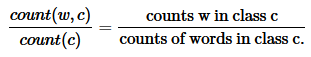

In [723]:
def classify_by_bayes(test_words):
    best_probability = float("-inf")
    class_ = "leisure-hobbies"
    for category in words_frequency_in_categories:
        probability = p_c
        for test in test_words:
            if test in words_frequency_in_categories[category]:
                probability *= words_frequency_in_categories[category][test] / len(words_in_categories[category])
            else:
                probability *= 0
        if probability > best_probability:
            best_probability = probability
            class_ = category
    return class_
test_df["bayes_result"] = test_df.apply(lambda row : classify_by_bayes(pr[row["data"]]), axis = 1);
test_df["correct"] = test_df.apply(lambda row : row["categories"] == row["bayes_result"], axis = 1);
test_df["correct"].value_counts()

False    1059
True     741 
Name: correct, dtype: int64

Note that in computing bayes probabilities, sum of **logarithms** of probabilities could be used instead of multiplting probabilities. I tested that one to but since in our model the probabilities does not get so close to zero it did not make any difference.

## Bigrams

**Question 3)** Clearly the postions of the words are important and the words are not independent from eachother. one of the ways to solve this problem is to use bigrams. In this projects I used unigrams, meaning I considered each word alone without considering its neighboure words. Basicalliy, N-grams are continuous sequences of words or symbols or tokens in a document. Maybe a word can be interpreted differently but since we are considering just one word we can not decide the class of the word correctly. Consider this Exmaple:
* This could cause **feet** amputation.
* The desks are how many **feet** long? 

Using bigrams can help us to classify better because we consider the releavant words in the text. In our example the words **amputation** and **long** could lead us to know the exact meaning of the word so using bigrams is enough and we do not need to take longer n-grams. Of couse by using **Trigram** we can determine the meaning better but our model gets more complex and it would be time consuming. Also it is not always helpful to consider a lot of words in each stage of classifying because it does not always give us so much more information if we consider a lot of words to determine the meaning of a word which could have just two meaning. Finally, it is a trade off between accuracy and complexity and also we should decide according to our context.

## Additive Smoothing

### **Question 4)** The problem of zero prabability in normal naive bayes method (without smoothing)

Additive smoothing solves the problem of **zero probability**. The approach of the **Naive Bayes** method we used above is that if a word does not exist in a class, the model consider the probability of $P(w|c) = 0$. Hence, based on the formula shown above the probability of $P(c|X) = 0$. When one term is zero the result gets zero because the result is the multiplication of all terms. Therefore, the probability of naive bayes is zero for class `c`. This result is extracted from this formula: 

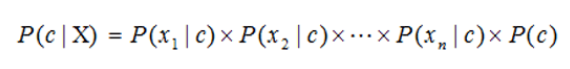

The term $P(c|X) = 0$ is definite that if this word occurs in the text we are sure that it is not belonged to the class `c`, but it is not necessarily correct. The slution to this problem is using **additive smoothing**.

### **Question 5)** Explain how does Additive smoothing work and implementation it.

Additive smoothing is commonly a component of naive Bayes classifiers. 
In a **bag of words model** of natural language processing, the data consists of the number of occurrences of each word in a document. Additive smoothing allows the assignment of non-zero probabilities to words which do **not occur** in the sample.
Consider the following formula:

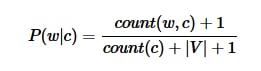

* **$count(w,c)$:** occurance frequency of word `w` in class `c`.
* **$count(c)$:** frequency of class `c` in train set.
* **$|v|$:** number of all vocabularies(unique words) in training data.

In this formula the number of $count(w,c)$ got increased by 1 (actually an unknown word is considered here to map the word with probability zero to this unknown word). The Denominator also increased by 1 and also we show add the number of all words in train data to it since 1- we are increasing the numerator by 1 for all the words in data set and also note that 2- the sum of this fraction should be 1. Therefore, there will be no zero probability and all probablities get a minimum probability and the problem is solved.

#### Implementation of Addiditive Smoothing

In [724]:
pr = dict()
for i, row in test_df.iterrows():
    pr[row["data"]] = pre_process(row["data"])

In [725]:
all_words = []
for category in words_in_categories:
    all_words.extend(words_in_categories[category])
    
count_all_unique_vocabularies = len(list(set(all_words)))

In [726]:
def classify_by_bayes_smoothing(test_words):
    best_probability = float("-inf")
    class_ = None
    count_w_c = 0
    for category in words_frequency_in_categories:
        probability = p_c
        count_c = len(words_in_categories[category])
        for test in test_words:
            if test in words_frequency_in_categories[category]:
                count_w_c = words_frequency_in_categories[category][test]
            else:
                count_w_c = 0
            probability *= (count_w_c + 1) / (count_c + count_all_unique_vocabularies + 1)
        if(probability > best_probability):
            best_probability = probability
            class_ = category
    return class_
test_df["bayes_result_smoothing"]  = test_df.apply(lambda row : classify_by_bayes_smoothing(pr[row["data"]]), axis = 1);
test_df["correct_smoothing"] = test_df.apply(lambda row : row["categories"] == row["bayes_result_smoothing"], axis = 1);
test_df["correct_smoothing"].value_counts()
# test_df_bayes_result_smoothing

True     1594
False    206 
Name: correct_smoothing, dtype: int64

## Assessing Correctness

category: leisure-hobbies, 5 highest: ['دوچرخه', 'قناری', 'جفت', 'فروش', 'نر']
category: vehicles, 5 highest: ['مدل', 'پراید', 'رنگ', 'سالم', 'بیمه']
category: for-the-home, 5 highest: ['مبل', 'میز', 'نو', 'سالم', 'نفره']
category: personal, 5 highest: ['سایز', 'نو', 'لباس', 'کفش', 'مجلس']
category: electronic-devices, 5 highest: ['گوش', 'سالم', 'سامسونگ', 'نو', 'تلویزیون']
category: businesses, 5 highest: ['فروش', 'دستگاه', 'نو', 'میز', 'عدد']


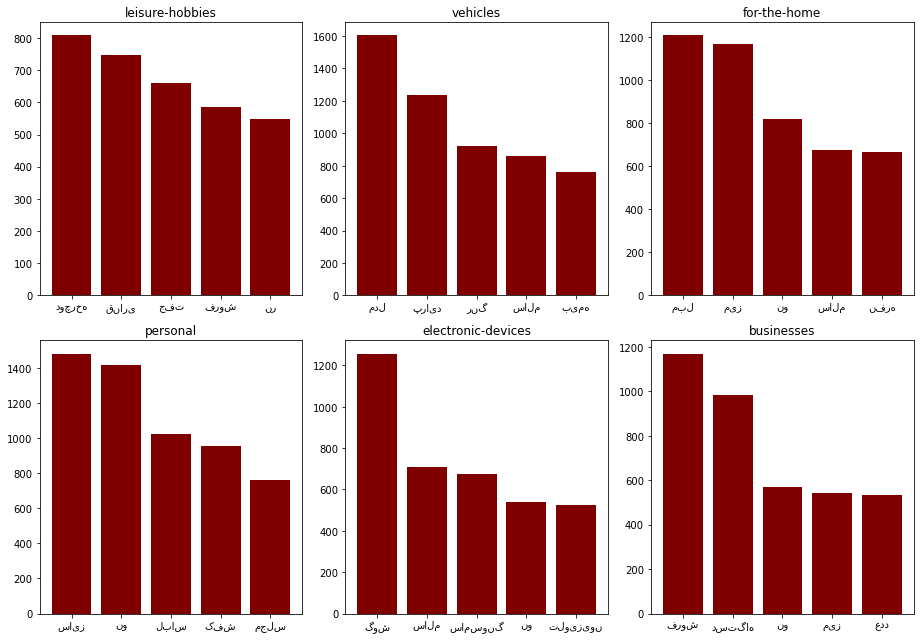

In [727]:
i = 1
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(13)
for category in words_frequency_in_categories:
    sorted_x = sorted(words_frequency_in_categories[category].items(), key=lambda kv: kv[1], reverse=True)
    sorted_dict = collections.OrderedDict(sorted_x)
    print(f"category: {category}, 5 highest: {list(sorted_dict.keys())[:5]}")
    ax=fig.add_subplot(2,3,i)
    ax.set_title(category)
    plt.tight_layout()
    plt.bar((list(sorted_dict.keys())[:5]),list(sorted_dict.values())[:5], color ='maroon');
    i+=1

In this plots we can see which words have highest frequency in each category among other words.
As we can see here some highest frequency words are in more than one category. like: "نو" و "سالم". It is more efective to omit them form the set of vocabularies because they do not help us to determine the category.

## Evaluating

$Accuracy  = \frac{Correct\space Detected}{Total}$

$Precision = \frac{Correct Detected Class}{All Detected Class}$

$Recall = \frac{Correct\space Detected\space Class}{Total\space Class}$

$F1 = 2 * (\frac{Precision * Recall}{Presicion+Recall})$

### Question 7) Precision and Recall

**Precision**: *Out of all the examples the classifier labeled as positive, what fraction were correct?*

As we can see from the formula, precision is the number of true positives divided by the number of true positives plus the number of false positives. Precision quantifies the number of correct class predictions that actually belong to the class. Precision tells us how much we can trust the model when it predicts an individual as Positive.

* Example of bad model with good precision score: In this project we have 300 of each class in the test data. Imagine a model lables 299 of `vehicles` class wrong and label just one of them correct(vehicles), in this case the precision of vehicles class is 1 but the model is vey bad.

**Recall:** *Out of all the positive examples there were, what fraction did the classifier pick up?*

Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
The Recall measures the model’s predictive accuracy for the positive class: intuitively, it measures the ability of the model to find all the positive units in the dataset. we do not consider false detections.

* Example of bad model with good recall score: In this project we have 300 of each class in the test data. Imagine a situation where a model that labels all the posts as `personal`, in this situation the recall value is 1 but we labeled 1200 of posts wrong!

### Question 8) F1

F1 Score is needed when you want to seek a balance between Precision and Recall. This is the **harmonic mean** of the two fractions. F1-measure weights **precision** and **recall** equally. This measure is approximately the average of the two when they are close but its not exactly the mean because it punishes extreme values. F1-score reaches its best value at 1 and worst score at 0. A classifier with a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0. F1 consider both correct labels and false labeles so it is a better way to evaluate out madel than precision and recall.

### Question 9) Multi-class metric

Classification tasks in machine learning involving more than two classes are known by the name of "multi-class classification". Performance indicators are very useful when the aim is to evaluate and compare different classification models. 7 most commonly used MC metrics: precision, recall, F1 score, ROC AUC score, Cohen Kappa score, Matthew’s correlation coefficient, and log loss. Here the precision, recall and F1 score are discussed.

* **Micro:** The idea of Micro-averaging is to consider all the units together, without taking into consideration possible differences between classes. So actually it is equal to the accuracy. In micro average all **samples** equally contribute to the final averaged metric. $micro-F1 = micro-precision = micro-recall = accuracy$
* **Macro:** Macro approach considers all the classes as basic elements of the calculation: each class has the same weight in the average, so that there is no distinction between highly and poorly populated classes. In Macro average all **classes** equally contribute to the final averaged metric.
* **Weighted:** Weighted keeps track of the importance of each class thanks to the frequency. In this case, large and small classes have a proportional effect on the result in relation to their size and the metric can be applied during the training phase of the algorithm on a wide number of classes. In weighted average each classes’s contribution to the average is **weighted by its size**.

In this project basedon the test data, the number of samples of each category in the test data set is 300 (it is equal for all classes) so the **Weighted** average will be the same as **Macro** average.

In [728]:
non_smooth_precision_in_category = dict()
non_smooth_recall_in_category = dict()
non_smooth_f1_in_category = dict()
def show_result(category):
    correct_detected = ((test_df["bayes_result"] == category) & (test_df["categories"] == test_df["bayes_result"])).sum()
    all_detected = (test_df["bayes_result"] == category).sum()
    total = (test_df["categories"] == category).sum()
    non_smooth_precision_in_category[category] = precision = correct_detected / all_detected * 100
    non_smooth_recall_in_category[category] = recall = correct_detected / total * 100
    non_smooth_f1_in_category[category] = f1 = 2 * (precision * recall) / (precision + recall)
    print('======')
    print(f"->{category}:")
    print(f"Precision: {precision :.5f}%")
    print(f"Recall: {recall :.5f}%")
    print(f"F1: {f1 :.5f}%")

In [729]:
print("NO SMOOTHING\n")
for category in words_in_categories:
    show_result(category)

NO SMOOTHING

->leisure-hobbies:
Precision: 22.71663%
Recall: 97.00000%
F1: 36.81214%
->vehicles:
Precision: 94.38202%
Recall: 28.00000%
F1: 43.18766%
->for-the-home:
Precision: 90.07634%
Recall: 39.33333%
F1: 54.75638%
->personal:
Precision: 91.30435%
Recall: 35.00000%
F1: 50.60241%
->electronic-devices:
Precision: 87.69231%
Recall: 19.00000%
F1: 31.23288%
->businesses:
Precision: 72.26891%
Recall: 28.66667%
F1: 41.05012%


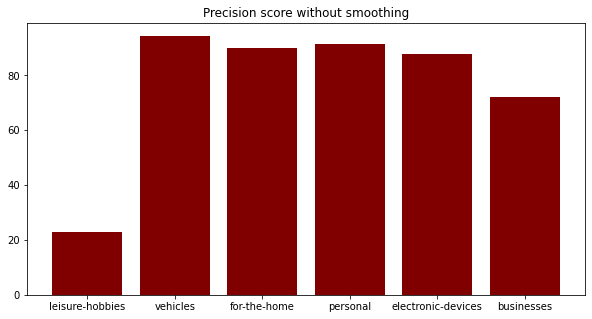

In [730]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(non_smooth_precision_in_category.keys())),list(non_smooth_precision_in_category.values()), color ='maroon');
plt.title("Precision score without smoothing");

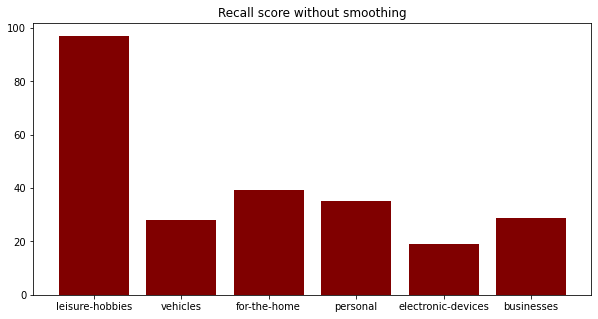

In [731]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(non_smooth_recall_in_category.keys())),list(non_smooth_recall_in_category.values()), color ='maroon');
plt.title("Recall score without smoothing");

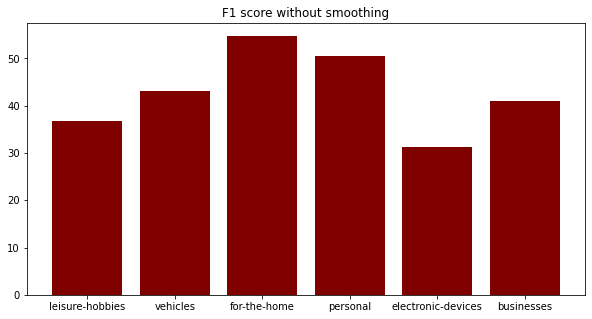

In [732]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(non_smooth_f1_in_category.keys())),list(non_smooth_f1_in_category.values()), color ='maroon');
plt.title("F1 score without smoothing");

In plots above we can see the trade off between **precision** and **recall** and also that the **F1** score is the harmonic mean of precision and recall.

### Micro

In [733]:
accuracy_non_smoothing = (test_df["correct"].sum() / len(test_df))*100
print(f"Accuracy: {accuracy_non_smoothing:.5f}%")

Accuracy: 41.16667%


### Macro

In [734]:
no_smoothing_macro_precision = sum(non_smooth_precision_in_category.values()) / len(words_in_categories.keys())
no_smoothing_macro_recall = sum(non_smooth_recall_in_category.values()) / len(words_in_categories.keys())
no_smoothing_macro_F1 = sum(non_smooth_f1_in_category.values()) / len(words_in_categories.keys())
print("Macro Average")
print(f"Precision: {no_smoothing_macro_precision:.5f}%")
print(f"Recall: {no_smoothing_macro_recall:.5f}%")
print(f"F1: {no_smoothing_macro_F1:.5f}%")

Macro Average
Precision: 76.40676%
Recall: 41.16667%
F1: 42.94027%


### Weighted

In [735]:
no_smoothing_weighted_precision = 0
no_smoothing_weighted_recall = 0
no_smoothing_weighted_f1 = 0
for category in words_in_categories:
    number_in_test = test_df['categories'].value_counts()[category]
    no_smoothing_weighted_precision += (number_in_test * non_smooth_precision_in_category[category])
    no_smoothing_weighted_recall += (number_in_test * non_smooth_recall_in_category[category])
    no_smoothing_weighted_f1 += (number_in_test * non_smooth_f1_in_category[category])
    
no_smoothing_weighted_precision = no_smoothing_weighted_precision / len(test_df)
no_smoothing_weighted_recall = no_smoothing_weighted_recall/len(test_df)
no_smoothing_weighted_f1 = no_smoothing_weighted_f1/len(test_df)
print("Weighted Average")
print(f"Precision: {no_smoothing_weighted_precision:.5f}%")
print(f"Recall: {no_smoothing_weighted_recall:.5f}%")
print(f"F1: {no_smoothing_weighted_f1:.5f}%")

Weighted Average
Precision: 76.40676%
Recall: 41.16667%
F1: 42.94027%


### With Smoothing

In [736]:
smooth_precision_in_category = dict()
smooth_recall_in_category = dict()
smooth_f1_in_category = dict()
def show_result(category, show = True):
    correct_detected = ((test_df['categories'] == test_df["bayes_result_smoothing"]) & (test_df["bayes_result_smoothing"] == category)).sum()
    all_detected = (test_df["bayes_result_smoothing"] == category).sum()
    total = (test_df['categories'] == category).sum()

    smooth_precision_in_category[category] = precision = correct_detected / all_detected * 100
    smooth_recall_in_category[category] = recall = correct_detected / total * 100
    smooth_f1_in_category[category] = f1 = 2 * (precision * recall) / (precision + recall)
    if show:
        print('======')
        print(f"->{category}:")
        print(f"Precision: {precision :.5f}%")
        print(f"Recall: {recall :.5f}%")
        print(f"F1: {f1 :.5f}%")
    return precision, recall, f1

In [737]:
print("WITH SMOOTHING\n")
for category in words_in_categories:
    show_result(category)

WITH SMOOTHING

->leisure-hobbies:
Precision: 91.54930%
Recall: 86.66667%
F1: 89.04110%
->vehicles:
Precision: 94.27609%
Recall: 93.33333%
F1: 93.80235%
->for-the-home:
Precision: 85.76052%
Recall: 88.33333%
F1: 87.02791%
->personal:
Precision: 89.66667%
Recall: 89.66667%
F1: 89.66667%
->electronic-devices:
Precision: 90.61489%
Recall: 93.33333%
F1: 91.95402%
->businesses:
Precision: 79.73422%
Recall: 80.00000%
F1: 79.86689%


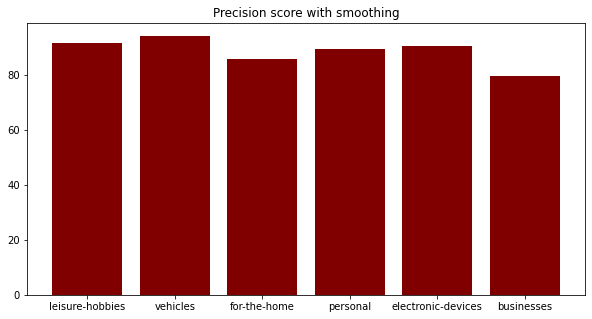

In [738]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(smooth_precision_in_category.keys())),list(smooth_precision_in_category.values()), color ='maroon');
plt.title("Precision score with smoothing");

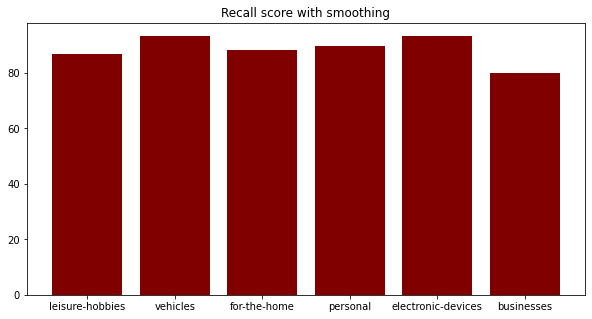

In [739]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(smooth_recall_in_category.keys())),list(smooth_recall_in_category.values()), color ='maroon');
plt.title("Recall score with smoothing");

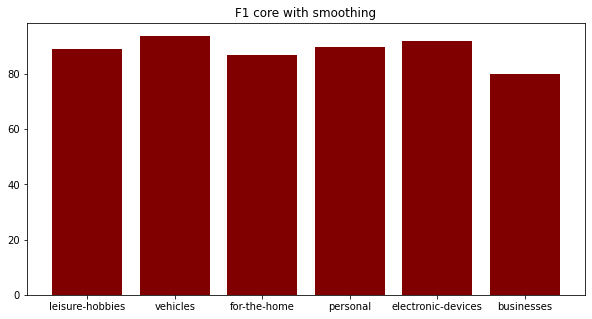

In [740]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.bar((list(smooth_f1_in_category.keys())),list(smooth_f1_in_category.values()), color ='maroon');
plt.title("F1 core with smoothing");

As we can see by additive smoothing the precesion and recall scores are balanced and they got higher also the F1 score is significantly better than the results without smoothing.

### Micro

In [745]:
accuracy_smoothing = (test_df["correct_smoothing"].sum() / len(test_df))*100
print(f"Accuracy With Smoothing: {accuracy_smoothing:.2f}%")

Accuracy With Smoothing: 88.56%


### Macro

In [746]:
smoothing_macro_precision = sum(smooth_precision_in_category.values()) / len(words_in_categories.keys())
smoothing_macro_recall = sum(smooth_recall_in_category.values()) / len(words_in_categories.keys())
smoothing_macro_f1 = sum(smooth_f1_in_category.values()) / len(words_in_categories.keys())
print("Macro Average With Smoothing:")
print(f"Precision: {smoothing_macro_precision:.5f}%")
print(f"Recall: {smoothing_macro_recall:.5f}%")
print(f"F1: {smoothing_macro_f1:.5f}%")

Macro Average With Smoothing:
Precision: 88.60028%
Recall: 88.55556%
F1: 88.55982%


### Weighted

In [747]:
smoothing_weighted_precision = 0
smoothing_weighted_recall = 0
smoothing_weighted_f1 = 0
for category in words_in_categories:
    number_in_test = test_df['categories'].value_counts()[category]
    smoothing_weighted_precision+=(number_in_test * smooth_precision_in_category[category])
    smoothing_weighted_recall +=(number_in_test * smooth_recall_in_category[category])
    smoothing_weighted_f1 +=(number_in_test * smooth_f1_in_category[category])
smoothing_weighted_precision =smoothing_weighted_precision / len(test_df)
smoothing_weighted_recall = smoothing_weighted_recall/ len(test_df)
smoothing_weighted_f1 = smoothing_weighted_f1/ len(test_df)
print("Weighted Average With Smoothing:")
print(f"Precision: {smoothing_weighted_precision:.5f}%")
print(f"Recall: {smoothing_weighted_recall:.5f}%")
print(f"F1: {smoothing_weighted_f1:.5f}%")

Weighted Average With Smoothing:
Precision: 88.60028%
Recall: 88.55556%
F1: 88.55982%


### Part A) With Additive Smoothing

|                |Businesses|Electronic Devices|For the home|Leisure Hobbies|Personal|Vehicles|All Classes||
|----------------|------------|-------------   |-----------|----------------|----------|-------|--------------|  |     
|   Precision    |   79.73%   |    90.61%      |   85.76%  |    91.55%      |    89.67% |94.28 |   -    ||
|   Recall       |     80.00% |   93.33%       |   88.33%    |     86.67%   |  89.67%   |93.33%|    -     ||
|   F1-score     |    79.87%  |    91.56%      |   87.03%    |     89.04%    |    89.67%|93.80%|     -     ||
|   Accuracy     |  -        |    -         |     -         |     -         |           |  -   |      88.56%        ||
|   Macro Avg    |  -        |    -         |     -         |    -         |            |-     |       88.55%    ||
|   Micro Avg    |  -        |    -        |     -         |     -           |          |-     |       88.56%     ||
|   Weighted Avg |  -        |    -     |         -         |     -          |          |-     |      88.55%  ||

### Part B) Without Additive Smoothing

|                |Businesses|Electronic Devices|For the home|Leisure Hobbies|Personal|Vehicles|All Classes||
|----------------|------------|-------------   |-----------|----------------|----------|-------|--------------|  |     
|   Precision    |   72.27%   |    87.69%      |   90.08%  |    22.70%      |    91.23% |94.38% |   -    ||
|   Recall       |     28.67% |   19.00%       |   39.33%    |     97.00%   |  34.67%   |28.33%|    -     ||
|   F1-score     |    41.05%  |    31.23%      |   54.76%    |     36.79%    |    50.24%|43.19%|     -     ||
|   Accuracy     |  -        |    -         |     -         |     -         |           |  -   |      41.11%         ||
|   Macro Avg    |  -        |    -         |     -         |    -         |            |-     |       42.88%    ||
|   Micro Avg    |  -        |    -        |     -         |     -           |          |-     |       41.11%     ||
|   Weighted Avg |  -        |    -     |         -         |     -          |          |-     |      42.88%  ||

### Question 11) comapring the results

As we can see above with the Additive smoothing, the results of all classes are drastically better although for some classes the result without additie smoothing is better. Of course when the result of all classes is better, the test dataset is labeled more accurate. We can see that F1 score is between precision and recall scores so as we expected beacuase it is somehow the mean of them. As we said before Always having high precision does not show that the model is good, we can see this in the second table where most of the presicions are high but the total result is not good. In the first table we can see that not only the results of precisio, recall and f1 are high but also close to eachother and the All classes results are very high.

### Question 12)

Here are some of the post which my model did not label correct:

In [744]:
import pandas as pd
false_label = test_df[test_df['correct_smoothing'] == False].reset_index()
false_label_df = false_label[['data','categories', 'bayes_result_smoothing']].copy()
pd.options.display.max_rows
false_label_df.tail()

,data,categories,bayes_result_smoothing
201,تعداد۳۹۰ عدد سکه. سکه بیست وپنج تومانی۲۵ سکه بیست وپنج تومانی۲۵ سکه بیست وپنج تومانی۲۵ سکه بیست وپنج تومانی۲۵,leisure-hobbies,businesses
202,باسلام روشنایی نو میباشد لطفافقط تماس باتشکر روشنایی گازی روشنایی گازی روشنایی گازی روشنایی گازی,for-the-home,businesses
203,فکس T... Come اصل ... در منزل استفاده شده . نو و سالم با گوشی و رول فکس فکس T...Come ، تی کام اصل آلمان فکس T...Come ، تی کام اصل آلمان فکس T...Come ، تی کام اصل آلمان فکس T...Come ، تی کام اصل آلمان,businesses,electronic-devices
204,دو قواره پارچه چادر 3/5متری مناسب برای عیدی دادن و....ب تلگرام پی ام بدهید. دو قواره پارچه چادری3/5متری دو قواره پارچه چادری3/5متری دو قواره پارچه چادری3/5متری دو قواره پارچه چادری3/5متری,personal,for-the-home
205,صد در صد برنج ،برای دیدن کارهای برنجی دیگر پیغام دهید جا لباسی جا لباسی جا لباسی جا لباسی,for-the-home,personal


In the model implemented in this project all the words are independent from their postion and other words in a post and also we just calculate the probabilities by the count of each word. So it could be normal that some categories which could have related words picked wrong by Naive Bayes for these posts. ّor example in the first sentence the word "سکه" could be in category "businesses" or "leisure-hobbies". Because some peaople use "سکه" for hobby and some peaple for businesses. This could be true for other examples above of wrong labels. So by just using the bag of words and unigram method in Naive Bayes classifier this mistakes can happen. Also the fact that descriptions are little and contains numbers and English words can effect. Also, maybe the stop words are not accurate and we missed some stop words or in some of these posts there are some words which are in several categories and have high frequency that could lead the Naive Classifier to choose wrong. Totally using unigram and bag of words method could mainly cause these wrong choices.

### Conclusion

In this assignment I used Naive Bayes Classifier to classify the advertisement posts in the `Divar` website. I  .I got familiar with the model of `bag-of-words` and the concept of `unigram` and other types of it. I got deeper in the naive bayes formula and how it functions and also some problems it has, for instance the zero probability. I learned haw to solve this problems like using `Additive Smoothing`. I got familiar with some popular ways to evaluate my model and assess how it works. Now I can use Naive Bayes Classifier for classifying data when I want to get a fast and also not bad results!